In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.getcwd())

/content



--------------INPUT------------------



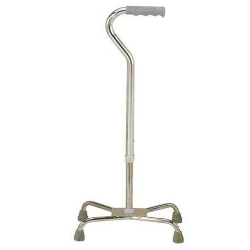

{0: 0.0, 1: 0.00028, 2: 0.00012, 3: 0.0, 4: 0.00151, 5: 14.95838, 6: 0.0, 7: 0.0, 8: 0.0, 9: 1e-05, 10: 0.00187, 11: 0.23655, 12: 0.00013, 13: 0.00582, 14: 0.0, 15: 36.4875, 16: 1e-05, 17: 1e-05, 18: 0.0, 19: 0.0, 20: 0.00107, 21: 48.30672, 22: 0.0, 23: 1e-05, 24: 0.0}

-------------------------------------- PREDICTION -------------------------------

Predicted Object : walker  with accuracy of  48.30672 %


In [65]:
#from labels import Labels    #uncomment this if code is in python file and comment execfile().......
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

#import cv2   # Just for showing the image, comment if not needed
from google.colab.patches import cv2_imshow    # Just for showing the image, comment if not needed


#PATHS
path_to_model = '/content/drive/MyDrive/Group - 5 : AI Overlord/Keras Model/keras_model.h5'
path_to_input_img  = '/content/drive/MyDrive/Group - 5 : AI Overlord/random images/00088.jpg'
execfile("/content/drive/MyDrive/Group - 5 : AI Overlord/labels.py")



# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model(path_to_model,compile=False)

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)


image = Image.open(path_to_input_img)


#Show input image
img = cv2.imread(path_to_input_img)
print("\n--------------INPUT------------------\n")
img = cv2.resize(img,(250,250))
cv2_imshow(img)




#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
image.show()


# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
# print("\n\n-------------------------- Predicted Array ----------------------")
# print(prediction,"\n\n\n")



#Give Output in One Word
score_index_dict={}
for score_list in prediction:
    for score in score_list:
        score_index = np.where(score_list==score)
        score_index_dict[score_index[0][0]]=round(score*100,5)

    
# print("\n\n------------------------------------ Final Accuracy ---------------------------------\n")
print(score_index_dict)
max_value = max(score_index_dict.values())
max_key = [k for k, v in score_index_dict.items() if v == max_value]
predicted = Labels[max_key[0]]
print("\n-------------------------------------- PREDICTION -------------------------------\n")
print("Predicted Object :", predicted," with accuracy of ",max_value,"%")



In [ ]:
!pip install tensorflow

In [69]:
print(Labels[5])

cane_stick
